In [ ]:
!pip install regex

In [ ]:
import pandas as pd
import regex
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("kangkerServiks2024.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1782348629694402743,Mon Apr 22 10:00:02 +0000 2024,14,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,1782348629694402743,NaN,NaN,in,"DKI Jakarta, Indonesia",0,2,6,https://twitter.com/HalodocID/status/178234862...,4618731253,HalodocID
1,1782234944674443730,Mon Apr 22 02:28:17 +0000 2024,0,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,1782234944674443730,https://pbs.twimg.com/media/GLvFMhDbMAAky8_.jpg,NaN,in,Jakarta Pusat,0,1,1,https://twitter.com/kaeflabklinik/status/17822...,2872909105,kaeflabklinik
2,1782987134498230449,Wed Apr 24 04:17:13 +0000 2024,0,1 warga negara ri meninggal setiap 1 jam karen...,1782987134498230449,NaN,NaN,in,dnf,0,1,0,https://twitter.com/endlessserie/status/178298...,1141681898,endlessserie
3,1781998600232587362,Sun Apr 21 10:49:08 +0000 2024,3,Bukan gak boleh sebenernya yg gak boleh itu ka...,1781998600232587362,NaN,NaN,in,NaN,0,1,1,https://twitter.com/gameelagiddan/status/17819...,1651030035376259074,gameelagiddan
4,1781507036158853611,Sat Apr 20 02:15:50 +0000 2024,0,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,1781507036158853611,https://pbs.twimg.com/media/GLkvJ5gaoAAvds6.jpg,NaN,in,"Kota Surabaya, Jawa Timur",0,0,0,https://twitter.com/RSAHKapasari/status/178150...,4307561726,RSAHKapasari


In [ ]:
df = df[['full_text']]
df

,full_text
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...
2,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...
...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...
91,Kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...




1.   Cleaning Data



In [ ]:
# Proses lower text
df['Clean'] = df.apply(lambda row: row['full_text'].lower(),axis=1)

In [ ]:
df[['full_text','Clean']]
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau ‼️ kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv ️ hpv (human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,@ryshw_ mbaknya udh takut kena kanker serviks ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
#Proses Menghapus @retweet
import re

In [ ]:
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)

In [ ]:
df[['full_text','Clean']]
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau ‼️ kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv ️ hpv (human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,mbaknya udh takut kena kanker serviks jd udh ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
# proses menghapus hashtag
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)

In [ ]:
df[['full_text','Clean']]
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau ‼️ kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv ️ hpv (human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,mbaknya udh takut kena kanker serviks jd udh ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
# Proses menghapus Links
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+","", row['Clean']),axis=1)

In [ ]:
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)

In [ ]:
df[['full_text','Clean']]
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau ‼️ kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv ️ hpv (human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,mbaknya udh takut kena kanker serviks jd udh ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
# Proses hapus punctuations
df['Clean'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Clean']),axis=1)

In [ ]:
df['Clean'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Clean']),axis=1)

In [ ]:
df[['full_text','Clean']]
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau ‼️ kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv ️ hpv human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,mbaknya udh takut kena kanker serviks jd udh ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
#Proses hapus Filtering non-alphanumeric characters
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)

In [ ]:
df[['full_text','Clean']]
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv hpv human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,mbaknya udh takut kena kanker serviks jd udh ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
df.shape

(94, 2)

In [ ]:
df = df.drop_duplicates(subset=['Clean'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

full_text    0
Clean        0
dtype: int64

In [ ]:
df.shape

(86, 2)

In [ ]:
df

,full_text,Clean
0,PEREMPUAN WAJIB TAU ‼️ Kanker serviks menempat...,perempuan wajib tau kanker serviks menempat...
1,Mari Kenali Penularan Virus HPV ️ HPV (Human p...,mari kenali penularan virus hpv hpv human p...
2,1 warga negara ri meninggal setiap 1 jam karen...,1 warga negara ri meninggal setiap 1 jam karen...
3,Bukan gak boleh sebenernya yg gak boleh itu ka...,bukan gak boleh sebenernya yg gak boleh itu ka...
4,Promo Vaksin HPV RS Adi Husada Kapasari sedang...,promo vaksin hpv rs adi husada kapasari sedang...
...,...,...
89,Kata Dokter Ini 5 Gejala Kanker Serviks yang S...,kata dokter ini 5 gejala kanker serviks yang s...
90,@ryshw_ Mbaknya udh takut kena kanker serviks ...,mbaknya udh takut kena kanker serviks jd udh ...
91,Kanker serviks merupakan salah satu penyakit y...,kanker serviks merupakan salah satu penyakit y...
92,Dalam curhatannya di Instagram finalis Miss Un...,dalam curhatannya di instagram finalis miss un...


In [ ]:
df = df[['Clean']]

In [ ]:
df.head(20)

,Clean
0,perempuan wajib tau kanker serviks menempat...
1,mari kenali penularan virus hpv hpv human p...
2,1 warga negara ri meninggal setiap 1 jam karen...
3,bukan gak boleh sebenernya yg gak boleh itu ka...
4,promo vaksin hpv rs adi husada kapasari sedang...
5,temukan dan dapatkan obat kanker serviks tumor...
6,temukan dan dapatkan obat kanker serviks tumor...
7,selain bersepeda fun bike charity juga mencaku...
8,kanker serviks terjadi karena sel sel tidak no...
9,11fess guys yang cewe cewe adakah yang pernah...


2. Preprocessing
    

*   Normalisasi
*   Stopword
*   Tokenize
*   Steaming



In [ ]:
#Normalisasi

norm = { "yg" : " yang ","tp": "Tetapi", "dm": "pesan pribadi",
        "tuk": "untuk", "alm": "Almarhum", "tb": "tinggi badan",
         "mintol": "minta tolong","yki": "yayasan kanker indonesia",
         "ml": "making love", "utk": "untuk", "gak": "tidak",
         "rscm": "rumah sakit cipto mangun kusumo","tau": "tahu",
         "udah": "sudah", "ngumpulin": "mengumpulkan", "kalo": "kalau",
         "ununtuk": "untuk","unununununununununtuk":"untuk" }

def normalisasi (str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['Clean'] = df['Clean'].apply(lambda x: normalisasi(x))

df

<ipython-input-29-8ed4e56e71c0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean'] = df['Clean'].apply(lambda x: normalisasi(x))


,Clean
0,perempuan wajib tahu kanker serviks menempa...
1,mari kenali penularan virus hpv hpv human p...
2,1 warga negara ri meninggal setiap 1 jam karen...
3,bukan tidak boleh sebenernya yang tidak bole...
4,promo vaksin hpv rs adi husada kapasari sedang...
...,...
89,kata dokter ini 5 gejala kanker serviks yang s...
90,mbaknya udh takut kena kanker serviks jd udh ...
91,kanker serviks merupakan salah satu penyakit y...
92,dalam curhatannya di instagram finalis miss un...


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
#Stopword
import Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak","dan", "yang", "atau", "dengan", "di", "lalu","itu",
                   "kemudian", "lalu", "untuk", "karena", "sejak", "sampai",
                   "sebelum", "ketika", "setelah", "jadi",
                   "serta", "lagipula", "Setelah", "sejak", "selanjutnya",
                   "tetapi", "melainkan", "sedangkan", "maupun", "ataupun",
                   "agar", "supaya", "sebab", "sehingga", "akibatnya",
                   "jika", "kalau", "jikalau", "walaupun", "meskipun", "biarpun",
                   "seperti", "sebagai", "bagaikan", "biar", "biarpun",
                   "bukannya", "melainkan","bila","kalau", "sedang", "atahu"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['Clean'] = df['Clean'].apply(lambda x: stopword(x))
df.head()

<ipython-input-31-079dc0c2e06a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean'] = df['Clean'].apply(lambda x: stopword(x))


,Clean
0,perempuan wajib tahu kanker serviks menempa...
1,kenali penularan virus hpv hpv human papill...
2,1 warga negara ri meninggal 1 jam kanker servi...
3,bukan boleh sebenernya boleh kalau pas menan...
4,promo vaksin hpv rs adi husada kapasari menyed...


In [ ]:
#Tokenize
tokenized = df['Clean'].apply(lambda x:x.split())
tokenized

0     [perempuan, wajib, tahu, kanker, serviks, mene...
1     [kenali, penularan, virus, hpv, hpv, human, pa...
2     [1, warga, negara, ri, meninggal, 1, jam, kank...
3     [bukan, boleh, sebenernya, boleh, kalau, pas, ...
4     [promo, vaksin, hpv, rs, adi, husada, kapasari...
                            ...                        
89    [kata, dokter, 5, gejala, kanker, serviks, ssu...
90    [mbaknya, udh, takut, kena, kanker, serviks, j...
91    [kanker, serviks, merupakan, salah, satu, peny...
92    [curhatannya, instagram, finalis, miss, univer...
93    [yang, tahu, guideline, pedoman, kanker, servi...
Name: Clean, Length: 86, dtype: object

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming (text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("hasilPreprocessingServiks.csv", index=False)


perempuan wajib tahu kanker serviks tempat urut dua jenis kanker paling banyak alami wanita indonesia 70 derita kanker serviks lambat deteksi mengapa penting vaksin hpv
kenal tular virus hpv hpv human papillomavirus rupa virus dapat sebab bagai sakit masuk kanker serviks vaksin hpv cara baik lindung diri virus segera laku vaksinasi dapat promo vaksin hpv
1 warga negara ri tinggal 1 jam kanker serviks then whyyyy ada subsidi significant buat vaksin hpv
bukan boleh sebenernya boleh kalau pas tangan keluarga akhir subjektif contoh diagnosis betul kanker serviks stadium 2 tetapi drnya liat kok keluarga sakit bgt nih kaya stadium 3 deh bukan 2 baik hindar dokter
promo vaksin hpv rs adi husada kapasari sedia promo vaksin hpv cegah primer kanker serviks promo laku 20 april 4 mei 2024 kuota batas syarat tentu laku
temu dapat obat kanker serviks tumor polip rahim miom kista barholin ovarium darah benjol vagina putih tahun sakit perut walatra sehat wanita 100 asli bahan kimia rp112 000 rp194 000

3. Translate

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv("hasilPreprocessingServiks.csv", encoding ='latin1')

In [ ]:
data.head()

,Clean
0,perempuan wajib tahu kanker serviks tempat uru...
1,kenal tular virus hpv hpv human papillomavirus...
2,1 warga negara ri tinggal 1 jam kanker serviks...
3,bukan boleh sebenernya boleh kalau pas tangan ...
4,promo vaksin hpv rs adi husada kapasari sedia ...


In [ ]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['Clean'].apply(convert_eng)
data.to_csv("TerjemahanServiks.csv")

4. Labeling

In [ ]:
data = pd.read_csv('TerjemahanServiks.csv', index_col=0)
data

,Clean,tweet_english
0,perempuan wajib tahu kanker serviks tempat uru...,women must know cervical cancer massage place ...
1,kenal tular virus hpv hpv human papillomavirus...,know the transmission of hpv virus hpv human p...
2,1 warga negara ri tinggal 1 jam kanker serviks...,1 citizen ri stay 1 hour cervical cancer then ...
3,bukan boleh sebenernya boleh kalau pas tangan ...,it's not possible if the final family hand pas...
4,promo vaksin hpv rs adi husada kapasari sedia ...,hpv vaccine promo rs adi husada cottonari avai...
...,...,...
81,kata dokter 5 gejala kanker serviks ssudah tan...,the doctor said 5 symptoms of cervical cancer ...
82,mbak udh takut kena kanker serviks jd udh jara...,mbak udh is afraid of getting cervical cancer ...
83,kanker serviks rupa salah satu sakit perlu was...,cervical cancer looks like one of the sick nee...
84,curhatannya instagram final miss universe 2020...,curhatannya instagram final miss universe 2020...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk


In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob (tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analysis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analysis Data:
Positif = 57
Netral = 15
Negatif = 14

Total Data : 86


In [ ]:
data['Klasifikasi'] = status
data

,Clean,tweet_english,Klasifikasi
0,perempuan wajib tahu kanker serviks tempat uru...,women must know cervical cancer massage place ...,Positif
1,kenal tular virus hpv hpv human papillomavirus...,know the transmission of hpv virus hpv human p...,Positif
2,1 warga negara ri tinggal 1 jam kanker serviks...,1 citizen ri stay 1 hour cervical cancer then ...,Positif
3,bukan boleh sebenernya boleh kalau pas tangan ...,it's not possible if the final family hand pas...,Negatif
4,promo vaksin hpv rs adi husada kapasari sedia ...,hpv vaccine promo rs adi husada cottonari avai...,Positif
...,...,...,...
81,kata dokter 5 gejala kanker serviks ssudah tan...,the doctor said 5 symptoms of cervical cancer ...,Netral
82,mbak udh takut kena kanker serviks jd udh jara...,mbak udh is afraid of getting cervical cancer ...,Negatif
83,kanker serviks rupa salah satu sakit perlu was...,cervical cancer looks like one of the sick nee...,Positif
84,curhatannya instagram final miss universe 2020...,curhatannya instagram final miss universe 2020...,Negatif


5. Visualisasi

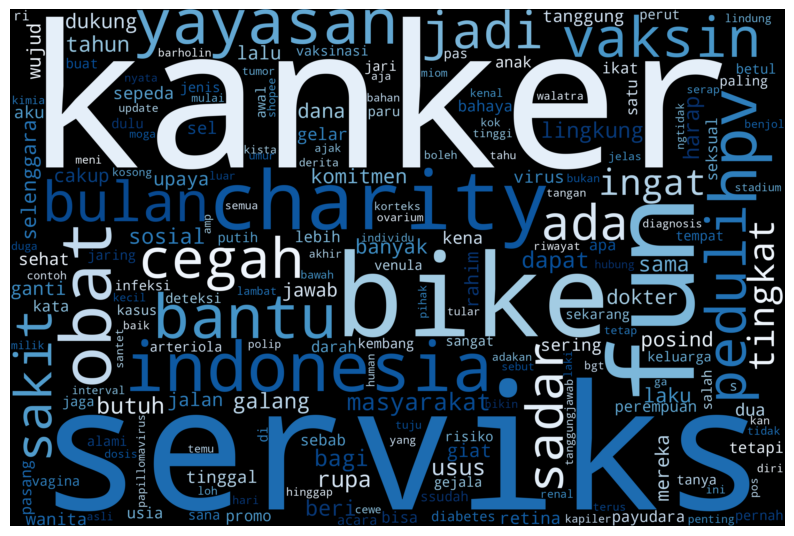

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud (wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['Clean']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud (wordcloud)

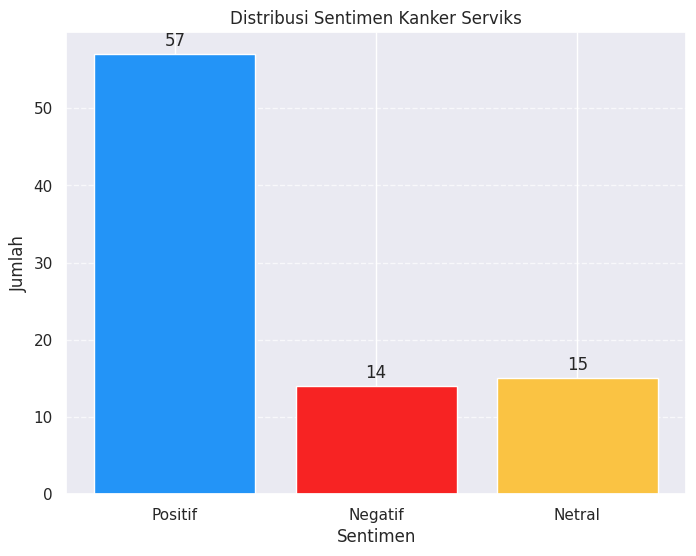

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart (labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip (bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()
show_bar_chart (labels, counts, "Distribusi Sentimen Kanker Serviks")

6. Klasifikasi Sentiment


In [ ]:
data

,Clean,tweet_english,Klasifikasi
0,perempuan wajib tahu kanker serviks tempat uru...,women must know cervical cancer massage place ...,Positif
1,kenal tular virus hpv hpv human papillomavirus...,know the transmission of hpv virus hpv human p...,Positif
2,1 warga negara ri tinggal 1 jam kanker serviks...,1 citizen ri stay 1 hour cervical cancer then ...,Positif
3,bukan boleh sebenernya boleh kalau pas tangan ...,it's not possible if the final family hand pas...,Negatif
4,promo vaksin hpv rs adi husada kapasari sedia ...,hpv vaccine promo rs adi husada cottonari avai...,Positif
...,...,...,...
81,kata dokter 5 gejala kanker serviks ssudah tan...,the doctor said 5 symptoms of cervical cancer ...,Netral
82,mbak udh takut kena kanker serviks jd udh jara...,mbak udh is afraid of getting cervical cancer ...,Negatif
83,kanker serviks rupa salah satu sakit perlu was...,cervical cancer looks like one of the sick nee...,Positif
84,curhatannya instagram final miss universe 2020...,curhatannya instagram final miss universe 2020...,Negatif


In [ ]:
dataset = data.drop(['Clean'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1]=='Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample (set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample (set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
      train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.7674418604651163


In [ ]:
nb_classifier = NaiveBayesClassifier.train(trainData)
print(accuracy(nb_classifier, testData))
#Output is 0.8152876648699048

print(nb_classifier.labels())
#Output is ['cat1', 'cat2', 'cat3']

NameError: name 'trainData' is not defined

In [ ]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis=TextBlob (tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data: \nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


Hasil Analisis Data: 
Positif = 75
Netral = 4
Negatif = 7

Total Data: 86


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes" : status})
data['klasifikasi_bayes'] = status

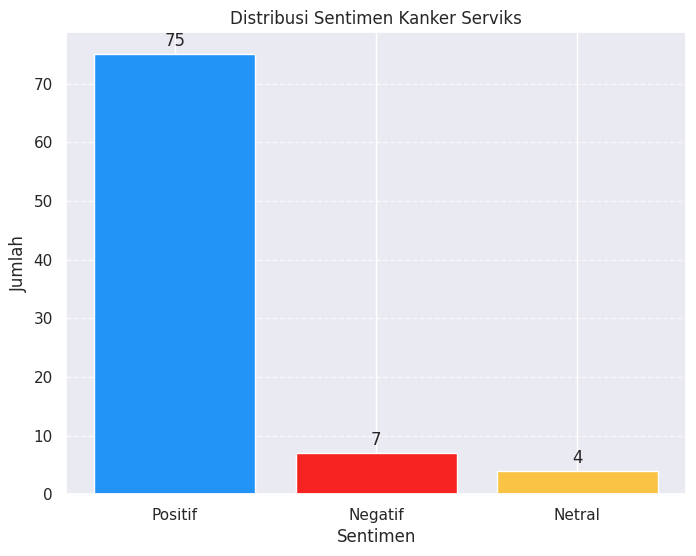

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart (labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip (bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()
show_bar_chart (labels, counts, "Distribusi Sentimen Kanker Serviks")

In [ ]:
data

,Clean,tweet_english,Klasifikasi,klasifikasi_bayes
0,perempuan wajib tahu kanker serviks tempat uru...,women must know cervical cancer massage place ...,Positif,Positif
1,kenal tular virus hpv hpv human papillomavirus...,know the transmission of hpv virus hpv human p...,Positif,Positif
2,1 warga negara ri tinggal 1 jam kanker serviks...,1 citizen ri stay 1 hour cervical cancer then ...,Positif,Positif
3,bukan boleh sebenernya boleh kalau pas tangan ...,it's not possible if the final family hand pas...,Negatif,Positif
4,promo vaksin hpv rs adi husada kapasari sedia ...,hpv vaccine promo rs adi husada cottonari avai...,Positif,Positif
...,...,...,...,...
81,kata dokter 5 gejala kanker serviks ssudah tan...,the doctor said 5 symptoms of cervical cancer ...,Netral,Positif
82,mbak udh takut kena kanker serviks jd udh jara...,mbak udh is afraid of getting cervical cancer ...,Negatif,Positif
83,kanker serviks rupa salah satu sakit perlu was...,cervical cancer looks like one of the sick nee...,Positif,Positif
84,curhatannya instagram final miss universe 2020...,curhatannya instagram final miss universe 2020...,Negatif,Negatif


In [ ]:
data_eval = [tuple(x) for x in data.to_records (index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n [2]}\nClassifier Bayes: {n[3]} \n')
    else:
        print("Tuple tidak memiliki cukup elemen.")

Text: bukan boleh sebenernya boleh kalau pas tangan keluarga akhir subjektif contoh diagnosis betul kanker serviks stadium 2 tetapi drnya liat kok keluarga sakit bgt nih kaya stadium 3 deh bukan 2 baik hindar dokter
Classifier: Negatif
Classifier Bayes: Positif 

Text: 11fess guys cewe cewe ada pernah vaksin hpv buat cegah kanker serviks solo mau tanya tanya ada
Classifier: Netral
Classifier Bayes: Positif 

Text: dinkes indramayu gelar workshop kanker serviks lewat media online bangun negeri
Classifier: Netral
Classifier Bayes: Positif 

Text: contoh lama ada berita selebgram s duga tinggal santet fakta s ssudah sadar ada santet 4 5 tahun lalu turut update s tinggal sakit medis kanker serviks
Classifier: Negatif
Classifier Bayes: Positif 

Text: 19 kanker serviks 20 retina 21 22 23 24 25 26 2r 27 25 28 1 29 1 2 4 8 16 32 30 3 2 31 pin dulu 32 depon 33 ga 34 semangat terus
Classifier: Positif
Classifier Bayes: Netral 

Text: apresiasi lalu giat harap tingkat sadar masyarakat kanker ser